# Qiskit Basics

### Single Qubit

In [1]:
##The following statement imports Qiskit libraries in the notebook!
import qiskit

In [2]:
##To create a Quantum Circuit with 1 qubit
from qiskit import QuantumCircuit as qc
cirq = qc(1)

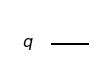

In [3]:
##To plot the circuit using MatplotLib
cirq.draw('mpl')

In [4]:
#To make a state vector and see it
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('0')

sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

In [5]:
#To see the specific Array data
sv.data

array([1.+0.j, 0.+0.j])

In [6]:
#To apply the new state vector over the constructed circuit 
new_sv = sv.evolve(cirq)
new_sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

In [7]:
#To check the State Fidelity
from qiskit.quantum_info import state_fidelity

state_fidelity(sv , new_sv)

1.0

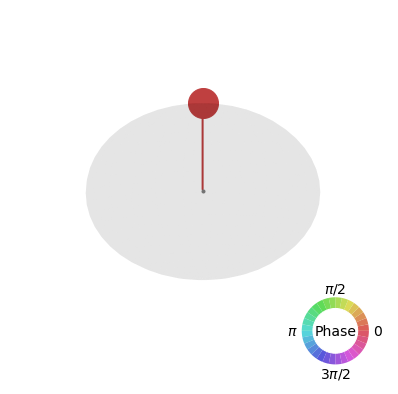

In [8]:
#To plot the Q-Sphere
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(new_sv.data)

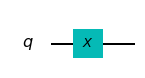

In [9]:
#Adding an X gate for qubit flip
cirq1 = qc(1)
cirq1.x(0)

cirq1.draw('mpl')

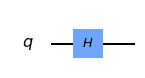

In [10]:
#Adding a hadamard gate to create a superposition
cirq2 = qc(1)
cirq2.h(0)

cirq2.draw('mpl')

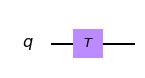

In [11]:
#Adding a t gate
cirq3 = qc(1)
cirq3.t(0)
cirq3.draw('mpl')

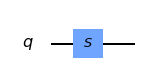

In [12]:
#Adding a s gate
cirq4 = qc(1)
cirq4.s(0)
cirq4.draw('mpl')

### Multi Qubits

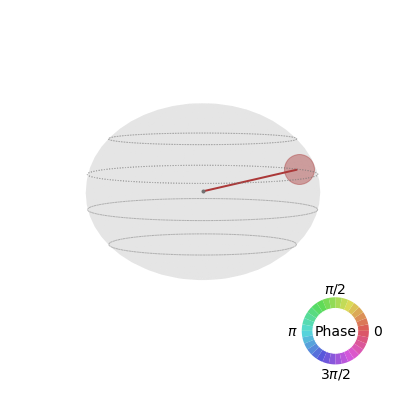

In [24]:
#Creating a multi state vector |00>
sv = Statevector.from_label('10010')
plot_state_qsphere(sv.data)

### Creating a Bell State

The two Qubit quantum circuit passed through: 1.) H-Gate 2.)C-NOT Gate

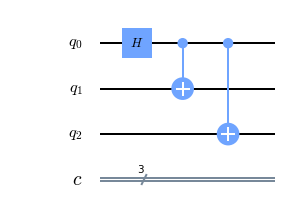

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


In [36]:
my_cirq = qc(3, 3)
my_sv = Statevector.from_label('000')
my_cirq.h(0)
my_cirq.cx(0 , 1)
my_cirq.cx(0 , 2)

display(my_cirq.draw('mpl'))
print(my_sv)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


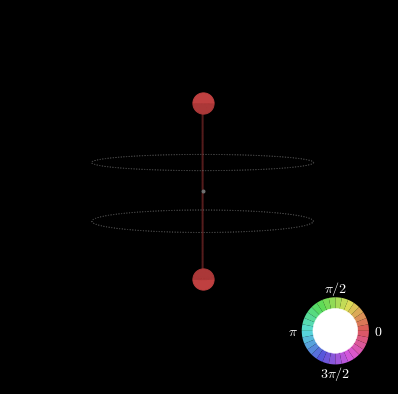

In [37]:
new_my_sv = my_sv.evolve(my_cirq)
print(new_my_sv)
plot_state_qsphere(new_my_sv.data)

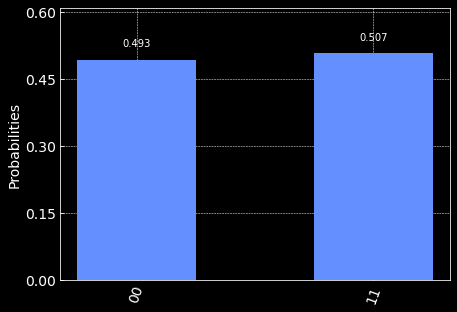

In [30]:
##Setting numer of shots and plotting the Histogram

counts = new_my_sv.sample_counts(shots = 1000)
from qiskit.visualization import *

from matplotlib import style
style.use('bmh')
style.use('dark_background')

plot_histogram(counts)

### Measreument

In [33]:
plot_state_city(my_sv)

VisualizationError: 'Input is not a valid quantum state.'

In [ ]:
my_cirq.measure([0,1], [0,1])
my_cirq.draw('mpl')

In [ ]:
from qiskit import *

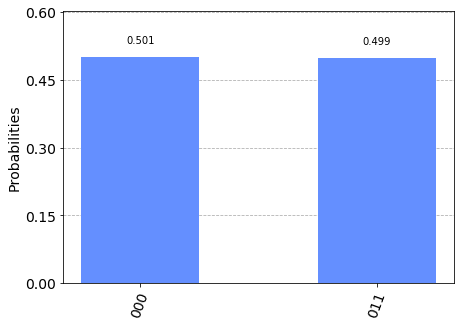

In [71]:
#SIMULATION
simulator = Aer.get_backend('qasm_simulator')
result = execute(my_cirq, simulator, shots=10000).result()
count = result.get_counts(my_cirq)
plot_histogram(count)